## 데이터 처리 환경설정

In [1]:
# !conda install -c anaconda pandas
# !conda install -c anaconda matplotlib
# !conda install -c anaconda seaborn
# !conda install scikit-learn
# !pip install opencv_python-4.4.0-cp38-cp38-win_amd64.whl

In [2]:
import cv2, time, collections
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

import sklearn
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
print('Sklearn version: {}'.format(sklearn.__version__))
print('Opencv version: {}'.format(cv2.__version__))
print('Matplot version: {}'.format(matplotlib.__version__))
print('Seaborn version: {}'.format(sns.__version__))

Sklearn version: 0.24.1
Opencv version: 4.4.0
Matplot version: 3.3.1
Seaborn version: 0.11.0


In [4]:
pd.set_option('display.float_format', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### 데이터 불러오기
* 개인정보 유출 때문에 개인 폴더에서 통일화 작업을 하고 불러옴

In [5]:
df_sam1_ori = pd.read_csv('./data/sample1.csv')
df_sam2_ori = pd.read_csv('./data/sample2.csv')

In [6]:
df_sam1 = df_sam1_ori.copy()
df_sam2 = df_sam2_ori.copy()

In [7]:
df_sam1.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,1,71,OD,2005-03-18 오후 12:57:56,NaN,2.8,5,41,1,14,5,3,-16.11,5,8.77,5,63,4,4,4,4,1,4,4,4,4,4,4,4,4,0,0,1,4,0,0,2,0,0,0,0,0,NaN,3,3,4,0,0,0,0,...,-10,-23,-30,-23,-33,-24,-31,-18,-17,-3,-9,-11,-28,-5,-5,-13,-5,-7,-7,-6,-9,NaN,-14,-13,-18,-10,-10,-7,-6,-15,NaN,-12,-7,-18,-19,-8,-12,-29,-31,-23,-21,-7,-31,-10,-21,-9,-16,-19,-18,-24
1,1,71,OS,2005-03-18 오후 1:08:41,NaN,0.0,5,24,1,13,4,3,-13.60,5,7.03,5,58,4,4,4,4,4,3,0,0,4,1,0,3,4,4,0,4,3,4,2,4,1,2,4,3,4,NaN,4,4,4,4,4,4,4,...,-26,-13,-3,-7,-21,-13,-3,-11,-15,-19,-9,-18,-17,-17,-12,-22,-11,-12,-19,-11,-17,NaN,-15,-14,-15,-15,-23,-13,-24,-32,NaN,-19,-15,-24,-19,-31,-3,-19,-17,-8,-11,-6,-16,-14,-8,-7,-1,-3,-3,-12


In [8]:
df_sam2.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,264,26,OD,2008-11-26 오후 4:38:34,NaN,0.0,1,4,2,19,7,3,-4.46,4,6.73,5,91,0,0,0,0,0,1,4,0,0,1,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,NaN,4,0,0,0,1,1,0,...,0,-5,-14,0,-3,-4,-27,1,-1,-1,0,0,-3,-2,-4,-20,-4,-5,-5,-3,-2,NaN,-33,-3,-3,-3,-5,-6,-3,-3,NaN,-4,-4,-3,-1,-3,-2,-4,-3,-3,-2,-3,-3,-3,-4,-3,-2,-3,-2,-4
1,264,26,OS,2008-11-04 오후 4:14:53,NaN,0.0,0,0,0,21,8,3,-13.01,5,14.83,5,67,4,4,4,4,4,4,4,4,4,4,4,3,0,4,4,0,4,4,0,4,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-33,-34,-21,-31,-33,-35,-28,-27,-11,-29,-23,-3,-33,-33,-1,-12,-32,-4,-2,-4,-6,NaN,-31,-3,-2,-3,-31,-3,-4,-6,NaN,-5,-8,-5,-7,-7,-6,-3,-4,-3,-2,-3,-3,-3,1,-2,-5,-2,-2,-7
2,264,26,OD,2008-11-04 오후 4:05:13,NaN,0.0,1,0,0,19,7,3,-4.42,4,7.31,5,89,0,0,0,0,0,0,4,2,0,0,4,0,0,0,0,0,1,0,0,4,0,0,0,1,0,NaN,4,1,0,1,2,0,1,...,-3,0,-16,-8,-1,0,-14,-3,0,1,0,0,-5,-1,-3,-35,-2,-4,-3,-4,-3,NaN,-33,-4,-2,-4,-6,-5,-4,-6,NaN,-4,-4,-5,-3,-5,-3,-4,-4,-8,-5,-2,-2,-2,-7,-4,-2,-1,-2,-2
3,264,26,OS,2008-11-03 오후 4:40:56,NaN,0.0,0,6,0,20,8,3,-13.83,5,14.23,5,67,4,4,4,4,4,4,4,4,4,4,3,2,0,4,1,3,4,4,0,3,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-33,-34,-27,-31,-33,-35,-10,-18,-4,-31,-11,-18,-33,-33,-4,-9,-28,-6,-3,-5,-6,NaN,-33,-3,-4,-4,-21,-4,-5,-5,NaN,-5,-3,-5,-7,-4,-5,-8,-8,-12,-3,-3,-3,-4,-11,-8,-9,-6,-5,-6
4,264,26,OD,2008-11-03 오후 4:12:10,NaN,0.0,0,8,0,17,6,3,-7.88,5,8.42,5,85,0,0,0,0,0,0,0,0,4,4,1,0,4,4,4,0,0,1,0,0,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-1,-4,-4,-3,-35,-19,-8,-5,-13,-19,-15,-6,-2,-7,-1,-3,-35,-4,-5,-5,-6,NaN,-33,-6,-4,-3,-12,-5,-6,-5,NaN,-7,-4,-4,-10,-5,-4,-9,-6,-3,-4,-3,-11,-3,-4,-7,-5,-5,-7,-8


## Data Preprocessing

* 검진 날짜를 datetime으로 바꿔줌 (정렬을 위해)
    * PID별, 연령별, 검진날짜 별로 정렬

In [9]:
df_sam2['Exam Date'] = pd.to_datetime(df_sam2['Exam Date'].apply(lambda x: x[:10]+' '+str(int(x[-7:-6])+12)+x[-6:] if '오후' in x else x[:10]+' '+x[-8:]))
df_sort2 = df_sam2.sort_values(['PID', 'AGE','Exam Date'], ascending = [True, True, False]).copy()

* 검사결과가 잘못된 경우 제외

In [11]:
df_sort2 = df_sort2[(df_sort2['Fixation loss']<=33)&(df_sort2['False negative percent']<=20)&(df_sort2['False positive percent']<=20)]

In [12]:
df_sort2.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
8,1,63,OS,2009-10-17 10:11:32,NaN,3.3,0,7,12,18,6,3,-23.80,5,8.82,5,23,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,NaN,0,4,0,0,0,4,0,...,-30,-29,-31,-31,-30,-30,-30,-25,-31,-33,-33,-30,-31,-26,-24,-31,-33,-22,-30,-34,-31,NaN,-13,-28,-16,-14,-14,-26,-9,-12,NaN,-3,-24,-15,-20,-20,-19,-18,-11,-10,-31,-23,-33,-33,-13,-7,-31,-31,-19,-25
10,2,51,OS,2010-11-19 10:32:01,NaN,6.4,1,0,0,13,4,2,-0.98,0,1.54,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,NaN,0,0,3,0,0,0,0,...,-1,1,0,0,2,1,0,-1,0,0,-1,0,-2,0,0,-2,-2,-4,-4,-1,-1,NaN,-1,-1,-6,-2,-1,-1,-2,-3,NaN,1,-2,0,-1,1,-2,-1,1,-1,-1,0,-1,0,-1,0,-3,0,0,0
9,2,51,OD,2010-11-19 10:25:16,NaN,6.4,1,3,0,16,5,1,-1.82,1,1.62,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,5,1,-3,-2,-4,0,-3,-1,-2,-1,-2,-3,0,-2,0,-2,-2,-3,-3,-3,-3,NaN,-3,-5,-2,-2,-3,-1,-1,-3,NaN,-6,0,-1,-3,-2,-2,-2,-2,-1,0,-2,-2,-3,-1,-1,-1,-2,0,-2
12,2,52,OS,2011-11-11 08:45:17,NaN,0.0,1,0,1,13,4,1,-0.51,0,1.27,0,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,-1,1,0,-3,-1,0,-1,0,0,-1,1,2,1,0,2,3,-1,0,2,-1,0,NaN,-1,-1,-2,-2,0,-2,-2,1,NaN,0,-1,0,0,2,-1,0,-1,0,-1,-1,-2,-2,-2,-3,-2,-1,2,-1
11,2,52,OD,2011-11-11 08:39:38,NaN,0.0,6,3,1,13,4,1,-0.44,0,1.67,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1,1,0,4,0,1,1,...,0,1,1,0,0,3,0,-1,-1,-1,-1,0,0,-3,1,3,-1,2,-1,-2,-2,NaN,-3,-2,-1,-4,-2,-2,-2,1,NaN,0,0,4,2,1,-1,1,0,0,-1,-1,-1,-1,-1,-2,0,1,2,0


In [13]:
pid_list = list(df_sort2['PID'].unique())

## 의문 데이터
* 같은 날 같은 눈을 2번 검사한 데이터가 있음
    * 검사결과가 이상할 경우 한번 더 검진한다고 함.
    * 급성 녹내장의 경우는 3개월에 1번씩 검사를 권함
        * 고로 2달 이내에 같은 검사를 했을 경우 최신 데이터만 쓰기로 함

In [14]:
df_sort2.groupby(['PID','AGE','Eye']).count()[df_sort2.groupby(['PID','AGE','Eye']).count()['Exam Date']>=2]

Exam Date  Exam ID  Pupil diameter  False positive percent  \
PID AGE Eye                                                               
10  47  OD           2        0               2                       2   
11  63  OD           3        0               3                       3   
        OS           3        0               3                       3   
12  71  OS           2        0               2                       2   
17  20  OD           6        0               6                       6   
...                ...      ...             ...                     ...   
251 63  OS           4        0               4                       4   
258 64  OD           3        0               3                       3   
        OS           3        0               3                       3   
264 26  OD           3        0               3                       3   
        OS           3        0               3                       3   

             False negative percent  Fixation loss  Fixation trial  \
PID AGE Eye                                                          
10  47  OD                        2              2               2   
11  63  OD                        3              3               3   
        OS                        3              3               3   
12  71  OS                        2              2               2   
17  20  OD                        6              6               6   
...                             ...            ...             ...   
251 63  OS                        4              4               4   
258 64  OD                        3              3               3   
        OS                        3              3               3   
264 26  OD                        3              3               3   
        OS                        3              3               3   

             Exam duration(min)  GHT  MD  MD probability  PSD  \
PID AGE Eye                                                     
10  47  OD                    2    2   2               2    2   
11  63  OD                    3    3   3               3    3   
        OS                    3    3   3               3    3   
12  71  OS                    2    2   2               2    2   
17  20  OD                    6    6   6               6    6   
...                         ...  ...  ..             ...  ...   
251 63  OS                    4    4   4               4    4   
258 64  OD                    3    3   3               3    3   
        OS                    3    3   3               3    3   
264 26  OD                    3    3   3               3    3   
        OS                    3    3   3               3    3   

             PSD probability  VFI  PDP_01  PDP_02  PDP_03  PDP_04  PDP_05  \
PID AGE Eye                                                                 
10  47  OD                 2    2       2       2       2       2       2   
11  63  OD                 3    3       3       3       3       3       3   
        OS                 3    3       3       3       3       3       3   
12  71  OS                 2    2       2       2       2       2       2   
17  20  OD                 6    6       6       6       6       6       6   
...                      ...  ...     ...     ...     ...     ...     ...   
251 63  OS                 4    4       4       4       4       4       4   
258 64  OD                 3    3       3       3       3       3       3   
        OS                 3    3       3       3       3       3       3   
264 26  OD                 3    3       3       3       3       3       3   
        OS                 3    3       3       3       3       3       3   

             PDP_06  PDP_07  PDP_08  PDP_09  PDP_10  PDP_11  PDP_12  PDP_13  \
PID AGE Eye                                                                   
10  47  OD        2       2       2       2       2       2       2       2   
11  63  OD        3       3       3      

* 제거할 인덱스를 뽑아내는 과정

In [15]:
# st_time = time.time()
# ft = 0

# ind_list = []

# for i in pid_list:
#     for j in df_sort2['AGE'].unique():
#         for k in df_sort2['Eye'].unique():
#             df_want = df_sort2[(df_sort2['PID']==i)&(df_sort2['AGE']==j)&(df_sort2['Eye']==k)]
#             date_want = df_want['Exam Date'].apply(lambda x : dt.datetime.toordinal(pd.to_datetime(str(x)[:10])))
#             if len(df_want)>=2 :
#                 for m in range(len(df_want)-1):
#                     if date_want.iloc[m] - date_want.iloc[m+1] <= 60:
#                         ind_list.append(df_want.index[m+1])

#     ft += 1
#     if ft%10==0 : 
#         ed_time = time.time() - st_time
#         print('\r남은 갯수 :', ft, '/', len(df_sort2['PID'].unique()), '\t\t남은 시간 :', round((ed_time/ft)*(len(df_sort2['PID'].unique())-ft-1), 2)
#              ,'\t\t', end='')

ind_list = [50, 57, 58, 66, 93, 90, 87, 97, 89, 95, 121, 131, 154, 150, 136, 172, 179, 191, 190, 205, 272, 273, 274, 285, 291, 286, 318, 326, 331, 327, 347, 366, 397, 424, 470, 480, 490, 511, 514, 508, 507, 516, 509, 557, 583, 626, 625, 627, 621, 622, 646, 648, 659, 698, 697, 754, 755, 735, 776, 812, 814, 808, 813, 811, 815, 832, 880, 933, 938, 948, 939, 952, 950, 1, 3, 2, 4]
df_sort2.drop(index = ind_list, inplace = True)

* 시계열 예측이기에 데이터가 너무 적으면 의미가 없음, 최소 6번의 검진이 있는 데이터만 사용할 것

In [17]:
want_pid = [[] for i in range(2)]
not_want_ind = []
for i in pid_list:
    for j in df_sort2['Eye'].unique():
        if len(df_sort2[(df_sort2['PID']==i) & (df_sort2['Eye']==j)])<6 :
            for k in df_sort2[(df_sort2['PID']==i) & (df_sort2['Eye']==j)].index:
                not_want_ind.append(k)
                
df_4 = df_sort2.drop(index = not_want_ind).copy()

In [29]:
df_4['Exam Date'] = df_4['Exam Date'].apply(lambda x : int((str(x)[:10]).replace('-','')))
df_4 = df_4.sort_values(['PID', 'AGE','Exam Date'], ascending = [True, True, True]).copy()

In [30]:
df_4.groupby(['PID','Eye']).count().head()

AGE  Exam Date  Exam ID  Pupil diameter  False positive percent  \
PID Eye                                                                    
2   OD     7          7        0               7                       7   
    OS     7          7        0               7                       7   
9   OS     6          6        0               6                       6   
12  OD     7          7        0               7                       7   
    OS     7          7        0               7                       7   

         False negative percent  Fixation loss  Fixation trial  \
PID Eye                                                          
2   OD                        7              7               7   
    OS                        7              7               7   
9   OS                        6              6               6   
12  OD                        7              7               7   
    OS                        7              7               7   

         Exam duration(min)  GHT  MD  MD probability  PSD  PSD probability  \
PID Eye                                                                      
2   OD                    7    7   7               7    7                7   
    OS                    7    7   7               7    7                7   
9   OS                    6    6   6               6    6                6   
12  OD                    7    7   7               7    7                7   
    OS                    7    7   7               7    7                7   

         VFI  PDP_01  PDP_02  PDP_03  PDP_04  PDP_05  PDP_06  PDP_07  PDP_08  \
PID Eye                                                                        
2   OD     7       7       7       7       7       7       7       7       7   
    OS     7       7       7       7       7       7       7       7       7   
9   OS     6       6       6       6       6       6       6       6       6   
12  OD     7       7       7       7       7       7       7       7       7   
    OS     7       7       7       7       7       7       7       7       7   

         PDP_09  PDP_10  PDP_11  PDP_12  PDP_13  PDP_14  PDP_15  PDP_16  \
PID Eye                                                                   
2   OD        7       7       7       7       7       7       7       7   
    OS        7       7       7       7       7       7       7       7   
9   OS        6       6       6       6       6       6       6       6   
12  OD        7       7       7       7       7       7       7       7   
    OS        7       7       7       7       7       7       7       7   

         PDP_17  PDP_18  PDP_19  PDP_20  PDP_21  PDP_22  PDP_23  PDP_24  \
PID Eye                                                                   
2   OD        7       7       7       7       7       7       7       7   
    OS        7       7       7       7       7       7       7       7   
9   OS        6       6       6       6       6       6       6       6   
12  OD        7       7       7       7       7       7       7       7   
    OS        7       7       7       7       7       7       7       7   

         PDP_25  PDP_26  PDP_27  PDP_28  PDP_29  PDP_30  PDP_31  PDP_32  \
PID Eye                                                                   
2   OD        7       0       7       7       7       7       7       7   
    OS        7       0       7       7       7       7       7       7   
9   OS        6       0       6       6       6       6       6       6   
12  OD        7       0       7       7       7       7       7       7   
    OS        7       0       7       7       7       7       7       7   

         PDP_33  PDP_34  PDP_35  ...  TDV_05  TDV_06  TDV_07  TDV_08  TDV_09  \
PID Eye                          ...                                           
2   OD        7       7       0  ...       7       7       7       7       7   
    OS        7       7       0  ...       7       7       7       7       7   
9   OS 

In [31]:
# 검사 값들
check_list = ['PDP', 'PDV', 'THV', 'TDP', 'TDV']

## 데이터 이상치 시각화 후 확인
   * THV를 제외한 다른 분야에서는 26, 35번 데이터는 측정이 안되는 것을 확인 - 맹점
   * 특이 데이터는 박사님과 논의
        - PDP, TDP는 P-value에 관한 것이므로 우선 PDV, THV, TDV를 먼저 살펴본다. 그 중에서도 THV를 먼저 살펴본다.
        - THV는 기계에서 환자가 반응한 가장 sensitive한 시표의 밝기
        - TDV는 THV - 일반인들의 평균
            - THV에서 주위의 값들과 다른 추이를 보이는 point 확인해보기
        - PDV는 TDV + Overall sensitivity
           - TDV의 같은 값이라도 시야의 위치에 따라 다를 수 있음, 눈의 중심에 가까울수록 중요


PDP


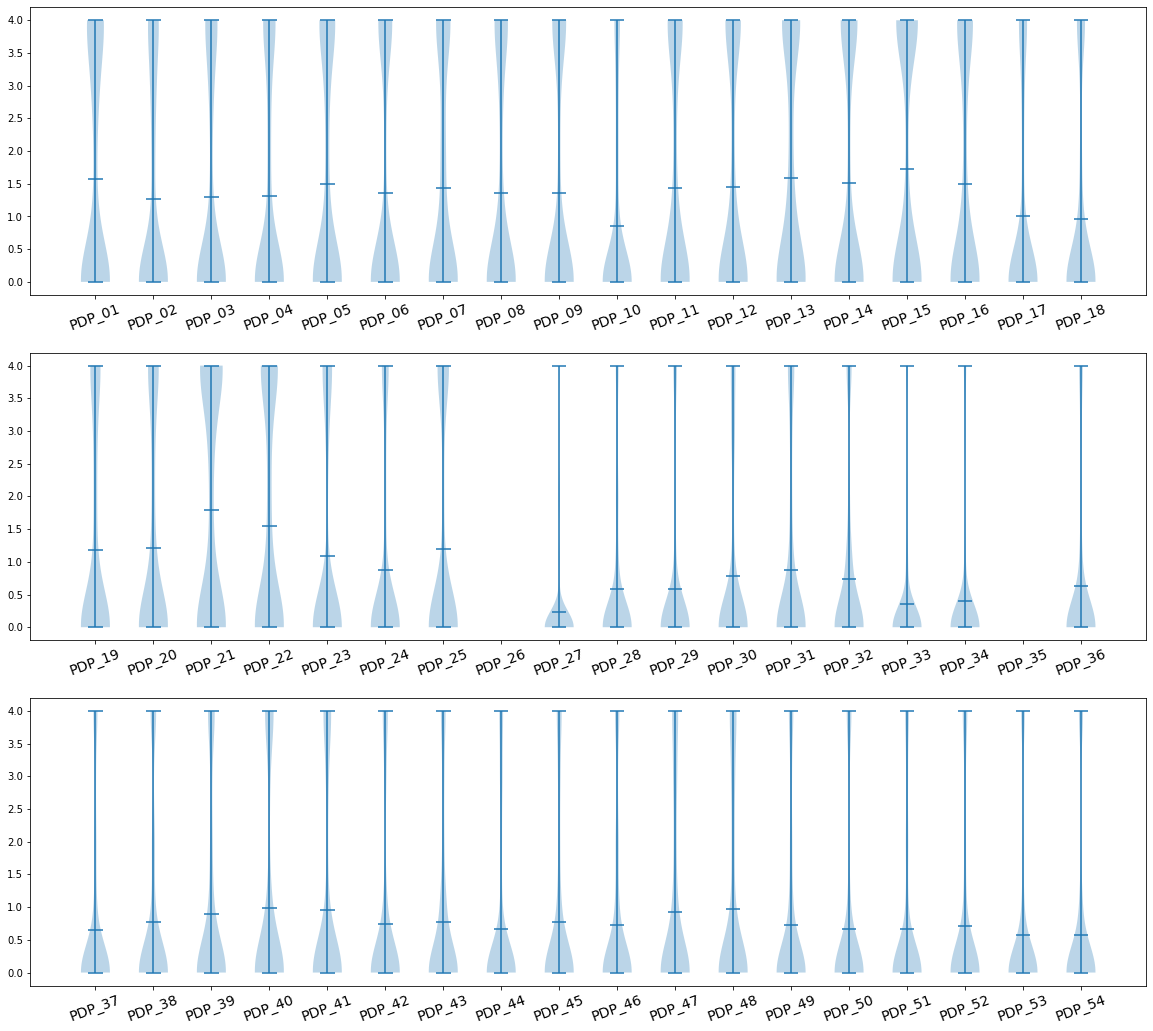


PDV


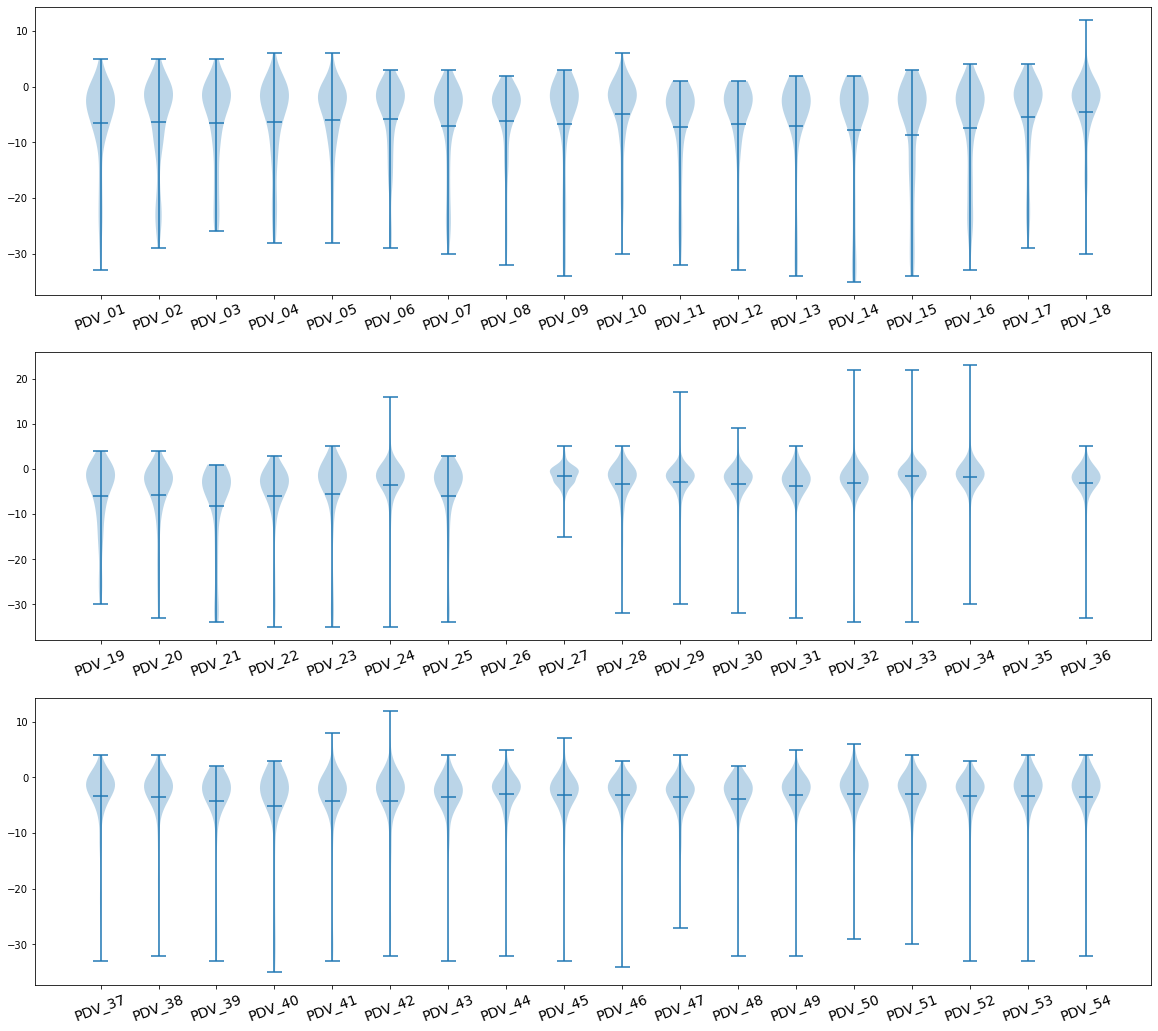


THV


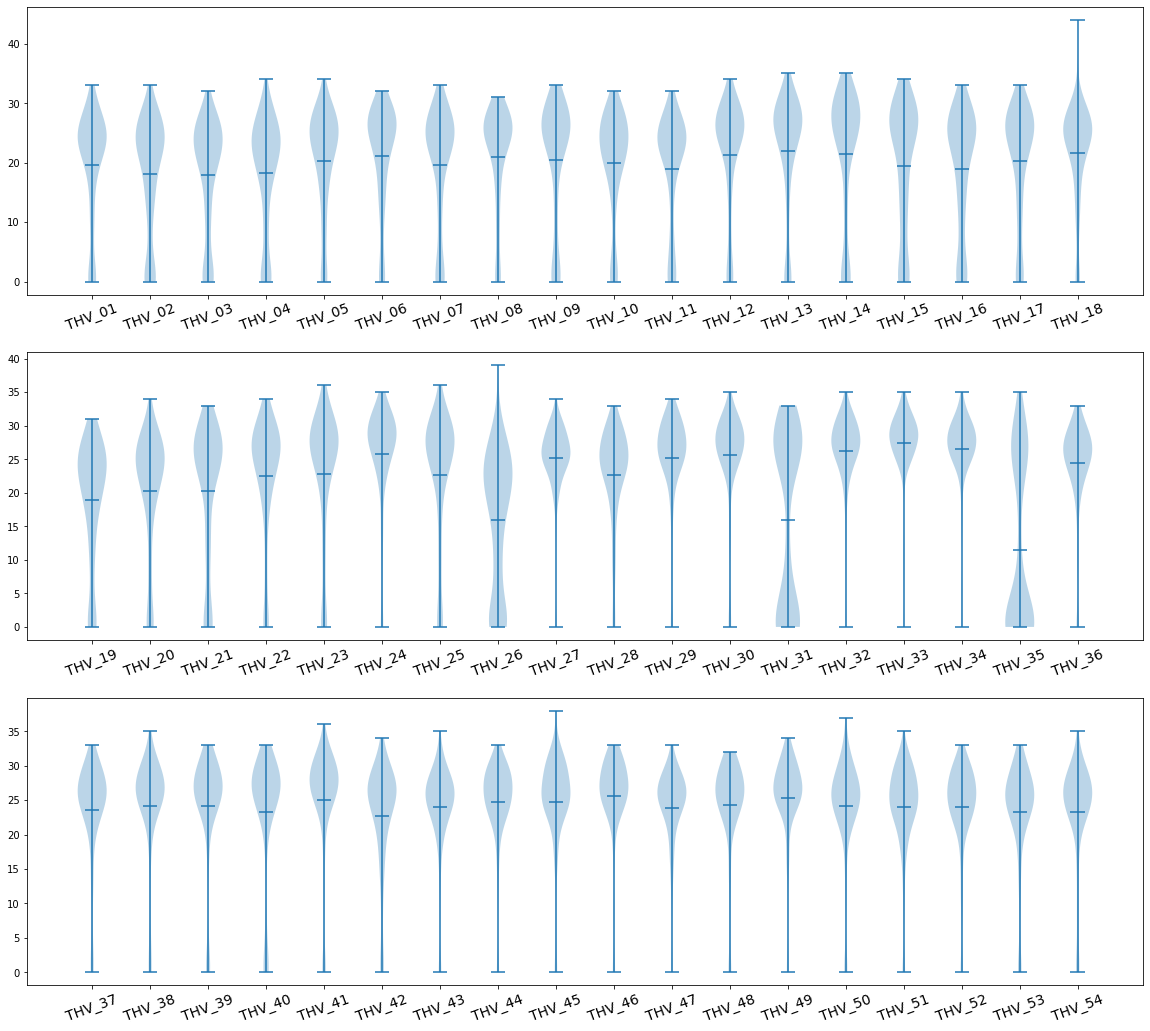


TDP


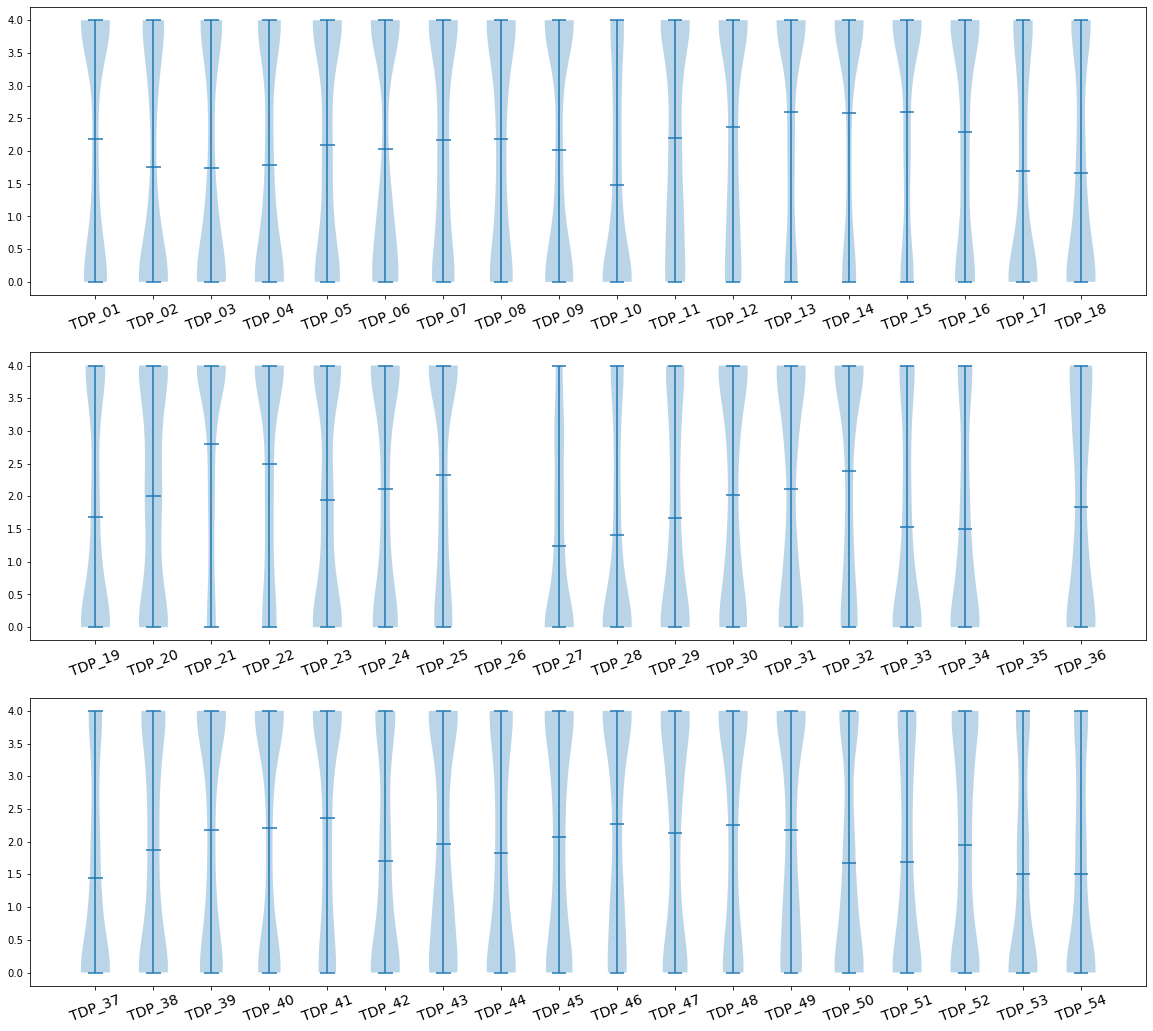


TDV


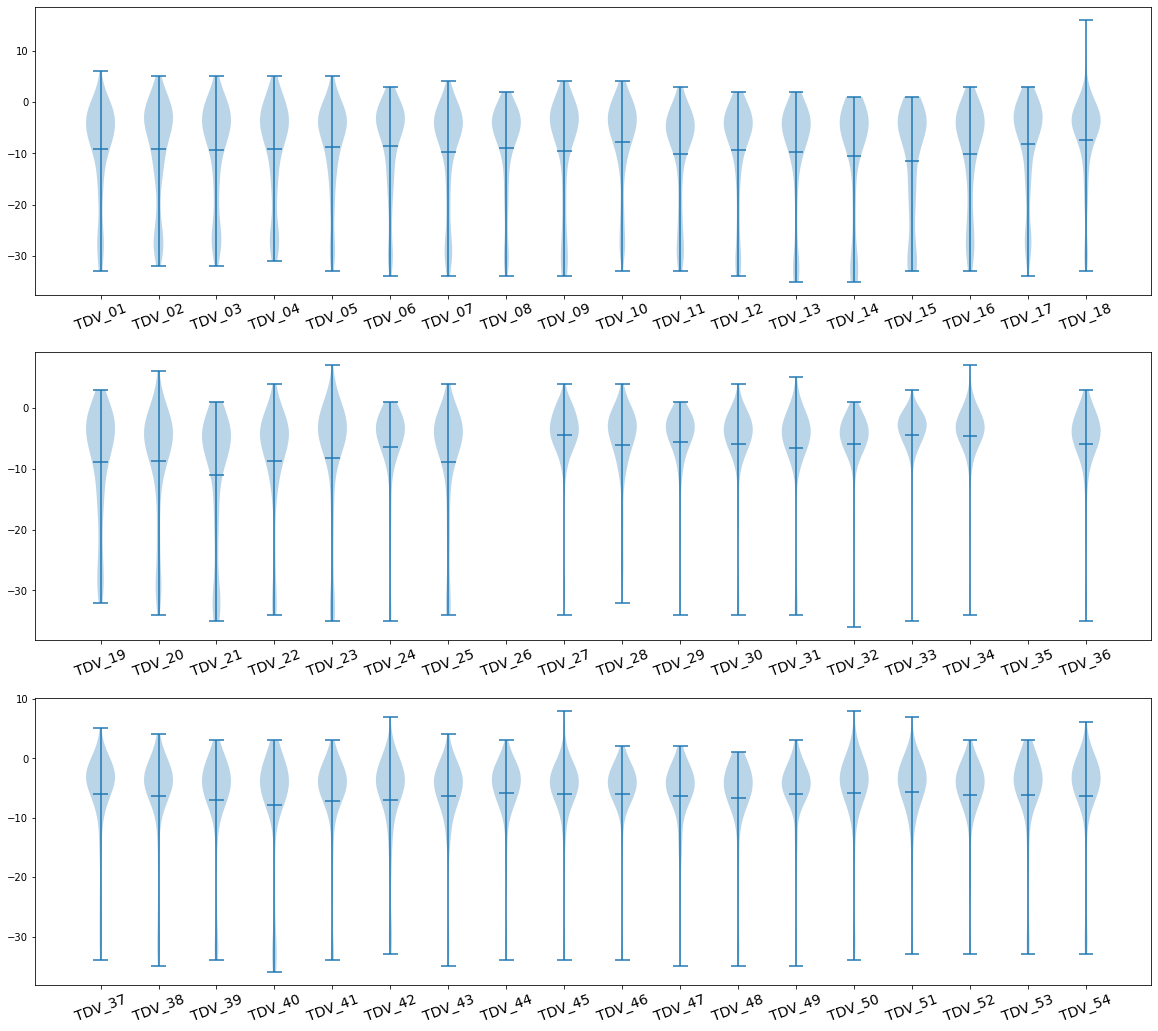

In [33]:
for m in range(len(check_list)):
    print()
    print(check_list[m])
    fig, axs = plt.subplots(3, 1, figsize = (20, 18))
    for k in range(0, 3):
        axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+54*m, 17+18*(k+1)+54*m)], showmeans = True)

        plt.sca(axs[k])
        plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+54*m, 17+18*(k+1)+54*m)],
                   fontsize = 14, rotation=20)

    plt.show()

### 특이값이 3개 있었던 THV를 우선적으로 살펴봄
* 26, 31, 35번 point가 특이하다
    * 26, 35번은 맹점이므로 검사가 제대로 이루어지지 않음, 따라서 31번을 중심적으로 바라보자

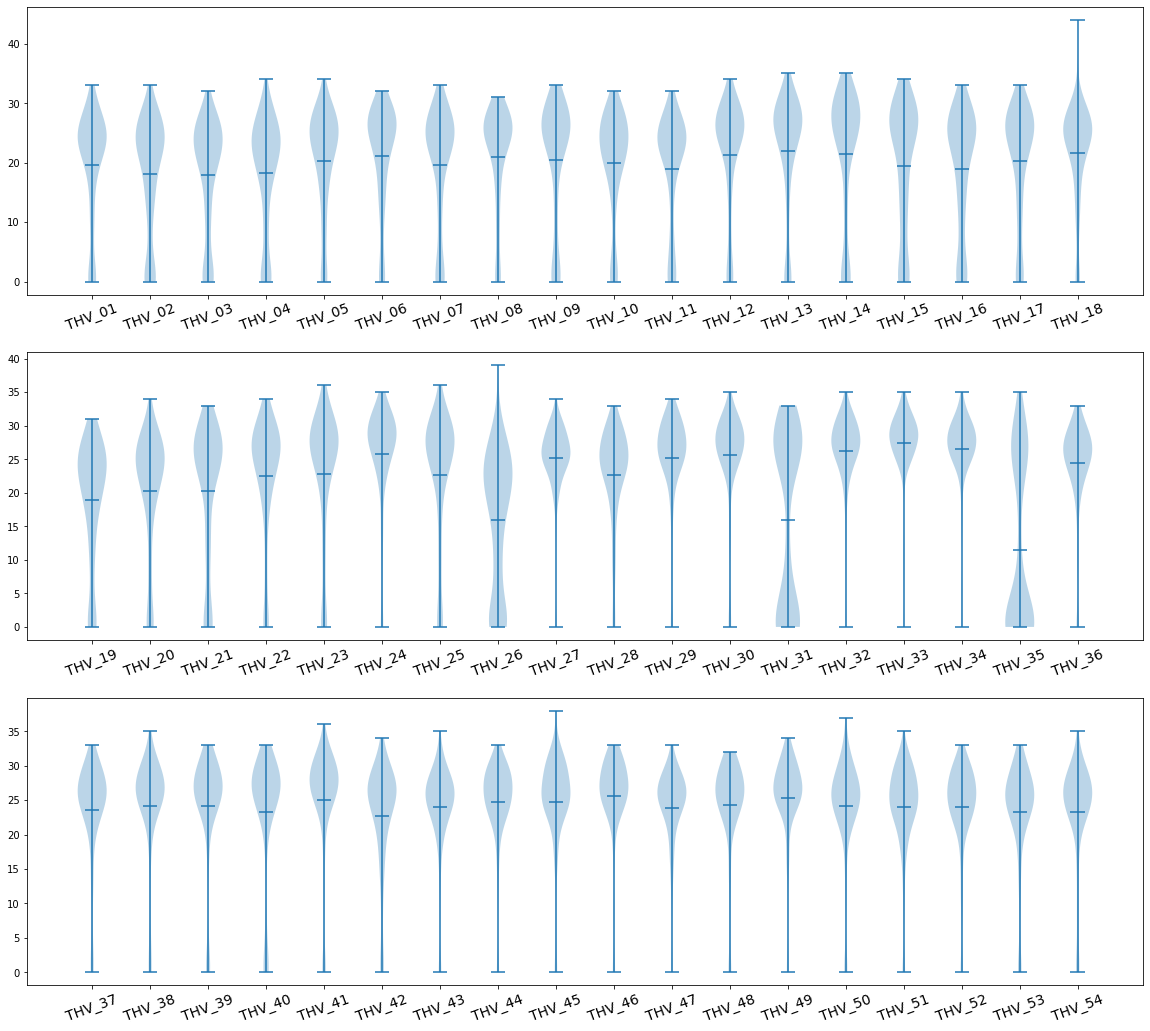

In [34]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+108, 17+18*(k+1)+108)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+108, 17+18*(k+1)+108)],
               fontsize = 14, rotation=20)

plt.show()

In [35]:
# value를 heatmap_rgb값으로 변환시켜줌
def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    
    if value == 0.1 :
        r = 255
        g = 255
        b = 255
    else :
        ratio = 2 * (value-minimum) / (maximum - minimum)
        b = int(max(0, 255*(1 - ratio)))
        r = int(max(0, 255*(ratio - 1)))
        g = 255 - b - r
    return r, g, b

In [36]:
# pid, eye, value로 조건에 맞는 데이터 추출 - value는 thv, tdv를 의미
def filter_person(data ,pid, eye, value):
    pid_person = data[(data['PID']==pid) & (data['Eye']==eye)]
    part_list = list(filter(lambda x : value in x, pid_person.columns))
    
    global filter_data #global 데이터로 밖에서도 쓸 수 있게 선언
    filter_data = pid_person[['PID','AGE','Eye','Exam Date']+part_list]

* 보통 눈의 경우 주위 8개와 비슷한 값을 나타낸다고 함. 31번 Point 주변 8개 point 시각화
    * 31번의 경우 다른 값들과 상이하게 0을 보이는 경우가 꽤 많음
        * 주위 8개 값의 평균으로 31번을 대체하기로 한다

In [37]:
def show_eye(data, pid, eye, value):
    # 원하는 환자의 검진날짜를 입력
    filter_person(data, pid, eye, value)
    print(list(filter_data['Exam Date']))

    input_date = input()
    vis_data = filter_data[filter_data['Exam Date']==int(input_date)]
    
    if vis_data['Eye'].iloc[0] == 'OS' : 
        visual_value = pd.DataFrame({input_date : [0.1]*72})
        ind_val = 0
        for i in range(72):
            if (i<2) or (6<=i<10) or (16<=i<18) or (i==26) or (53<=i<55) or (61<=i<65) or (69<=i):
                visual_value[input_date][i] = 0.1
            else :
                visual_value[input_date][i] = vis_data.iloc[:,-54:].values[0][ind_val]
                ind_val += 1
                
    elif vis_data['Eye'].iloc[0] == 'OD': 
        visual_value = pd.DataFrame({input_date : [0.1]*72})
        ind_val = 0
        for i in range(72):
            if (i<3) or (7<=i<11) or (17<=i<19) or (i==45) or (54<=i<56) or (62<=i<66) or (70<=i):
                visual_value[input_date][i] = 0.1
            else :
                visual_value[input_date][i] = vis_data.iloc[:,-54:].values[0][ind_val]
                ind_val += 1

    use_val = visual_value.values
    img = np.zeros((400, 450, 3), np.uint8)

    ext_ind = 0
    for i in range(72):
        if ext_ind == 0 :
            point1 = 50*i, 0
        else : point1 = 50*(i-9*ext_ind), 0+50*ext_ind
        point2 = point1[0]+50, point1[1]+50
        point3 = point1[0]+7, point1[1]+25
        img = cv2.rectangle(img, point1, point2, rgb(min(use_val), max(use_val), use_val[i]), -1)
        img = cv2.putText(img, str(use_val[i][0]), point3, 16, 0.4, (255, 255, 255), thickness =2)

        if (i%9==8):
            ext_ind += 1

    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # cv2.imshow(input_date, imgRGB)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    plt.imshow(imgRGB)
    plt.show()

[20101119, 20111111, 20121031, 20131025, 20140926, 20151006, 20171024]
20111111


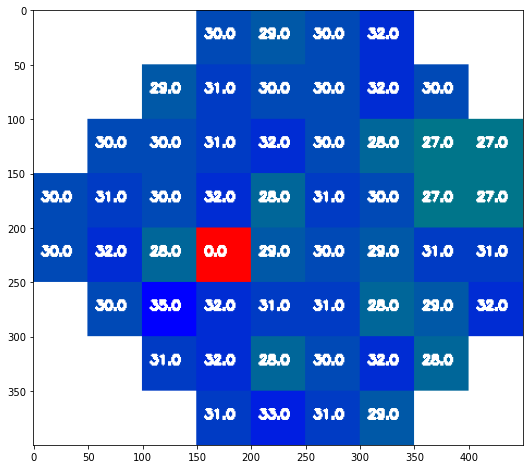

In [39]:
show_eye(df_4, 2, 'OD', 'THV')

31번 데이터 이상치를 주위 8개 값의 평균으로 맞춰줌

In [40]:
for i in range(len(df_4)):
    df_4['THV_31'].iloc[i] = int(round(np.mean([df_4['THV_21'].iloc[i], df_4['THV_22'].iloc[i], df_4['THV_23'].iloc[i], df_4['THV_31'].iloc[i], 
       df_4['THV_32'].iloc[i], df_4['THV_38'].iloc[i], df_4['THV_39'].iloc[i], df_4['THV_41'].iloc[i]])))

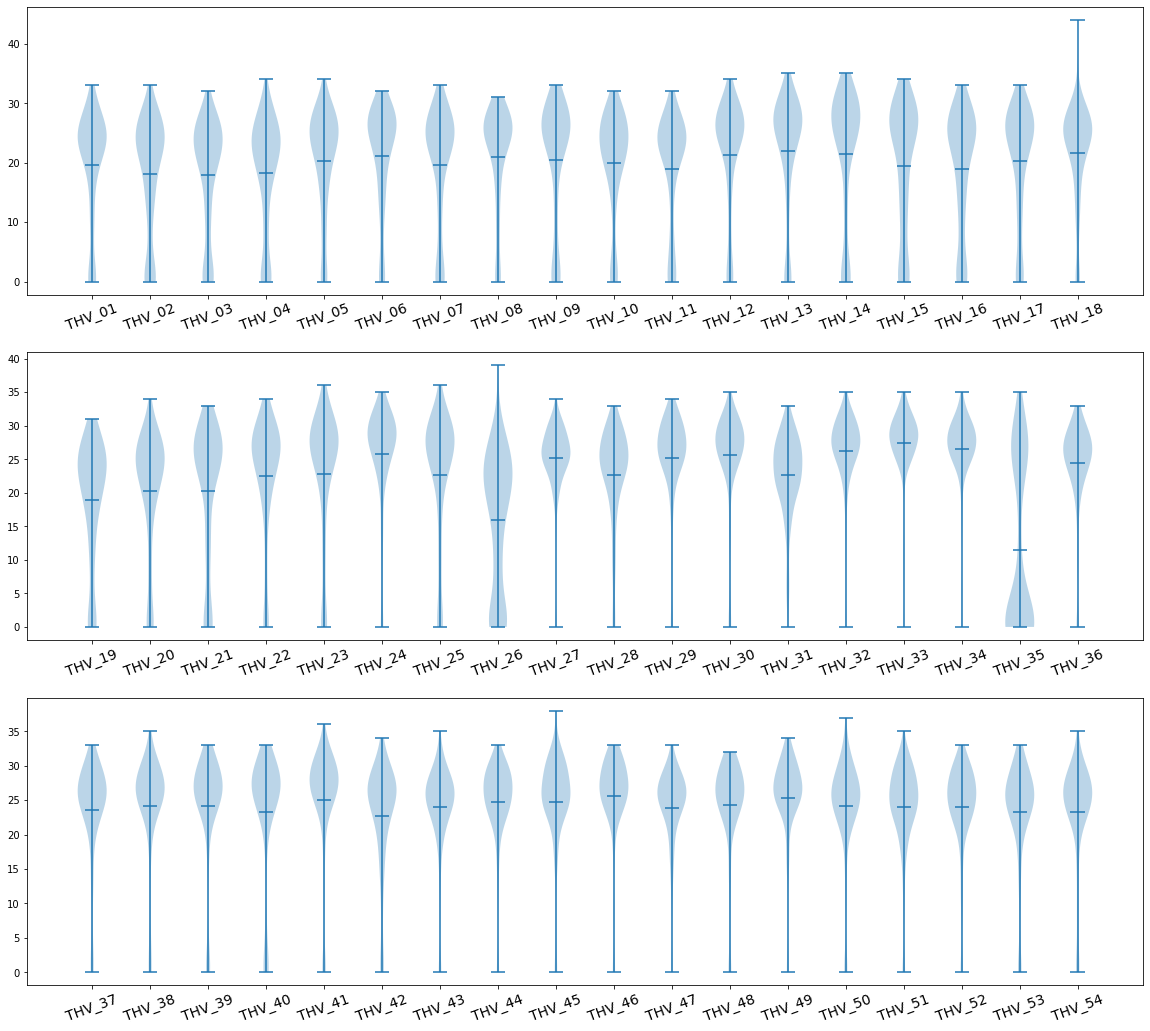

In [41]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+108, 17+18*(k+1)+108)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+108, 17+18*(k+1)+108)],
               fontsize = 14, rotation=20)

plt.show()

## 측정 오류 검증 
![Value Info](./data/value.png)

* 우리는 TDV = THV - 일반인들의 평균임을 알고 있다.
    * 같은 나이대의 일반인들의 평균은 모두 같음
        * 따라서 나이가 같다면 THV - TDV도 같아야할 것
            * 평균에서 5이상 벗어날 경우 데이터가 잘못 측정 되었다고 판단

In [42]:
mean_list = ['mean'+str(i) for i in range(1,55)]

In [43]:
for i in range(len(mean_list)):
    df_4[mean_list[i]] = df_4.iloc[:,17+54*2+i] - df_4.iloc[:,17+54*4+i]

* 같은 나이대, 눈에 따른 일반인의 평균을 구해봤을 때 역시나 여러 Point들이 **문제가 많음**을 알 수 있음
    * 검사결과의 오류일 가능성이 높다고 판단, 최빈값으로 오류값들을 채워줌

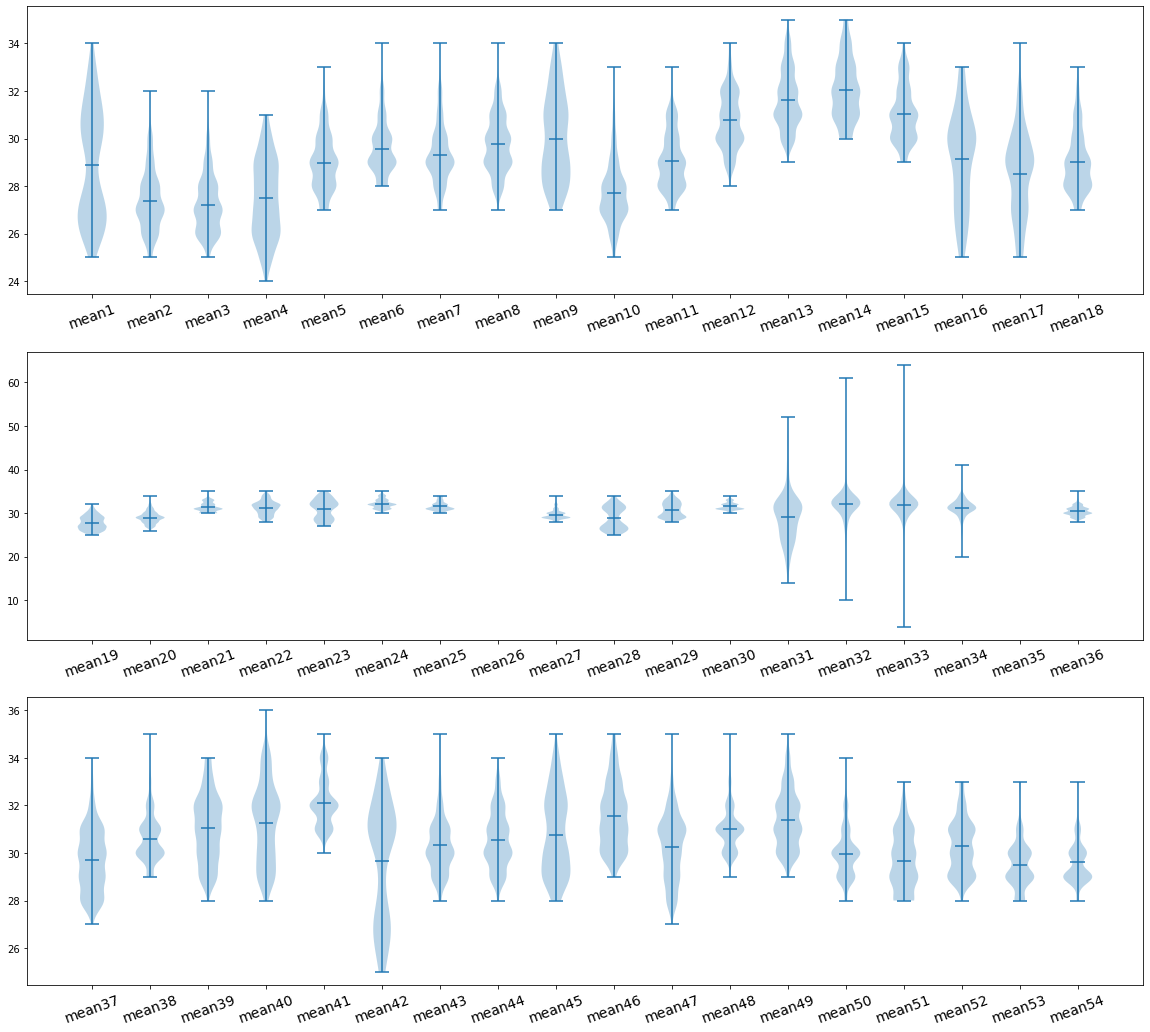

In [44]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+270, 17+18*(k+1)+270)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+270, 17+18*(k+1)+270)],
               fontsize = 14, rotation=20)

plt.show()

In [45]:
df_30 = df_4[(30<df_4['AGE'])]
df_40 = df_4[(30<=df_4['AGE']) & (50>df_4['AGE'])]
df_60 = df_4[(50<=df_4['AGE']) & (70>df_4['AGE'])]
df_70 = df_4[(70<=df_4['AGE'])]

In [46]:
for i in range(len(df_4)):
    for j in df_4.columns[-54:].drop(['mean26','mean35']): 
        if (df_4['AGE'].iloc[i]<30): 
            if (abs(df_4[j].iloc[i] - df_30[j].mode()[0])>=6) :
                df_4[j].iloc[i] = df_30[j].mode()[0]

        elif (df_4.iloc[i]['AGE']>=30) and (df_4.iloc[i]['AGE']<50):
            if abs(df_4.iloc[i][j] - df_40[j].mode()[0])>=6 :
                df_4[j].iloc[i] = df_40[j].mode()[0]

        elif (df_4.iloc[i]['AGE']>=50) and (df_4.iloc[i]['AGE']<70):
            if abs(df_4.iloc[i][j] - df_60[j].mode()[0])>=6 :
                df_4[j].iloc[i] = df_60[j].mode()[0]

        elif (df_4.iloc[i]['AGE']>=70) :
            if abs(df_4.iloc[i][j] - df_70[j].mode()[0])>=6 :
                df_4[j].iloc[i] = df_70[j].mode()[0]

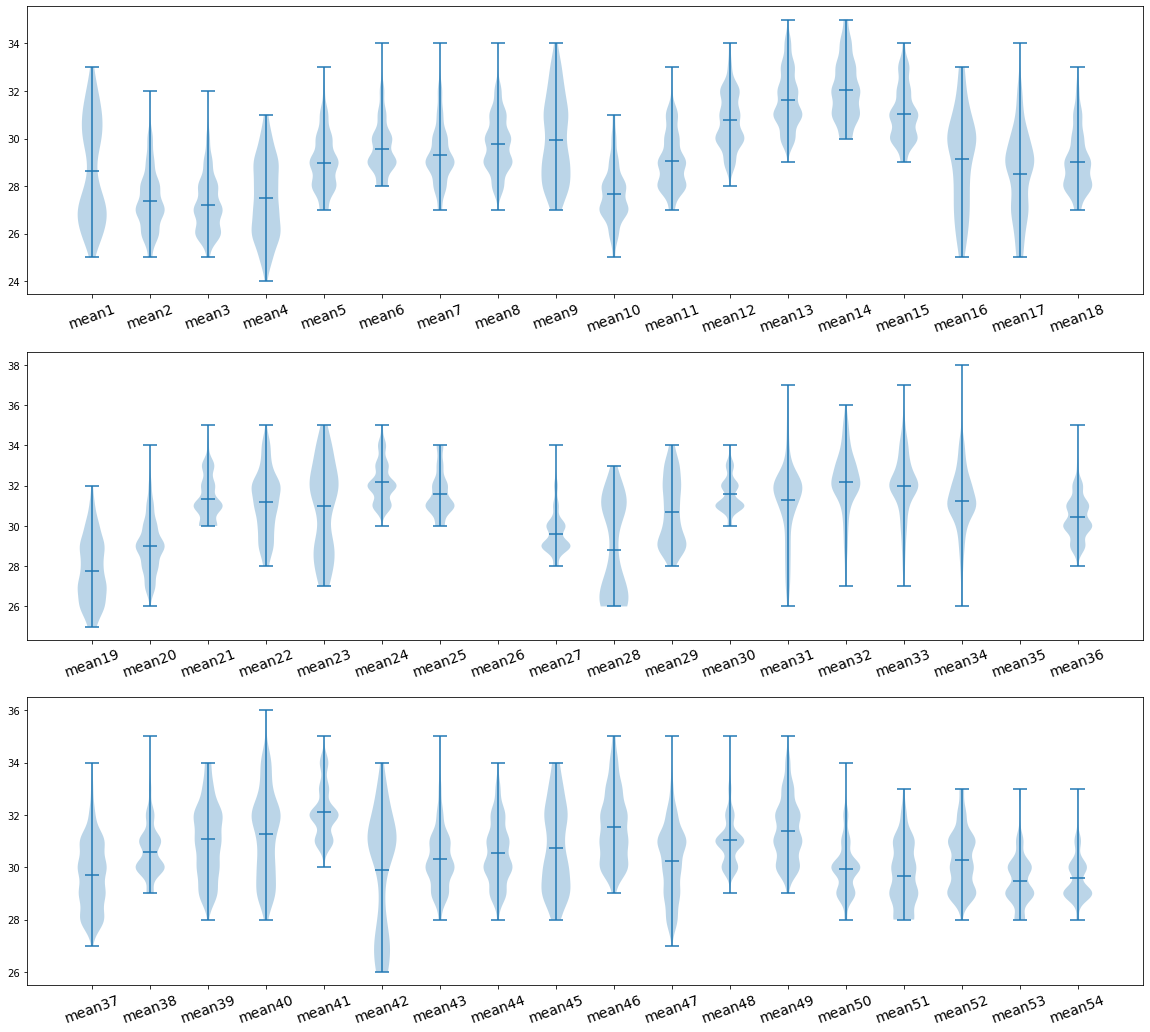

In [47]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+270, 17+18*(k+1)+270)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+270, 17+18*(k+1)+270)],
               fontsize = 14, rotation=20)

plt.show()

In [48]:
real_THV_list = ['mythv_'+str(i) for i in range(1,55)]
for i in range(len(real_THV_list)):
    df_4[real_THV_list[i]] = df_4.iloc[:,17+54*5+i] + df_4.iloc[:,17+54*4+i]

* 데이터의 형태들이 일반적인 형태를 띔을 확인할 수 있다

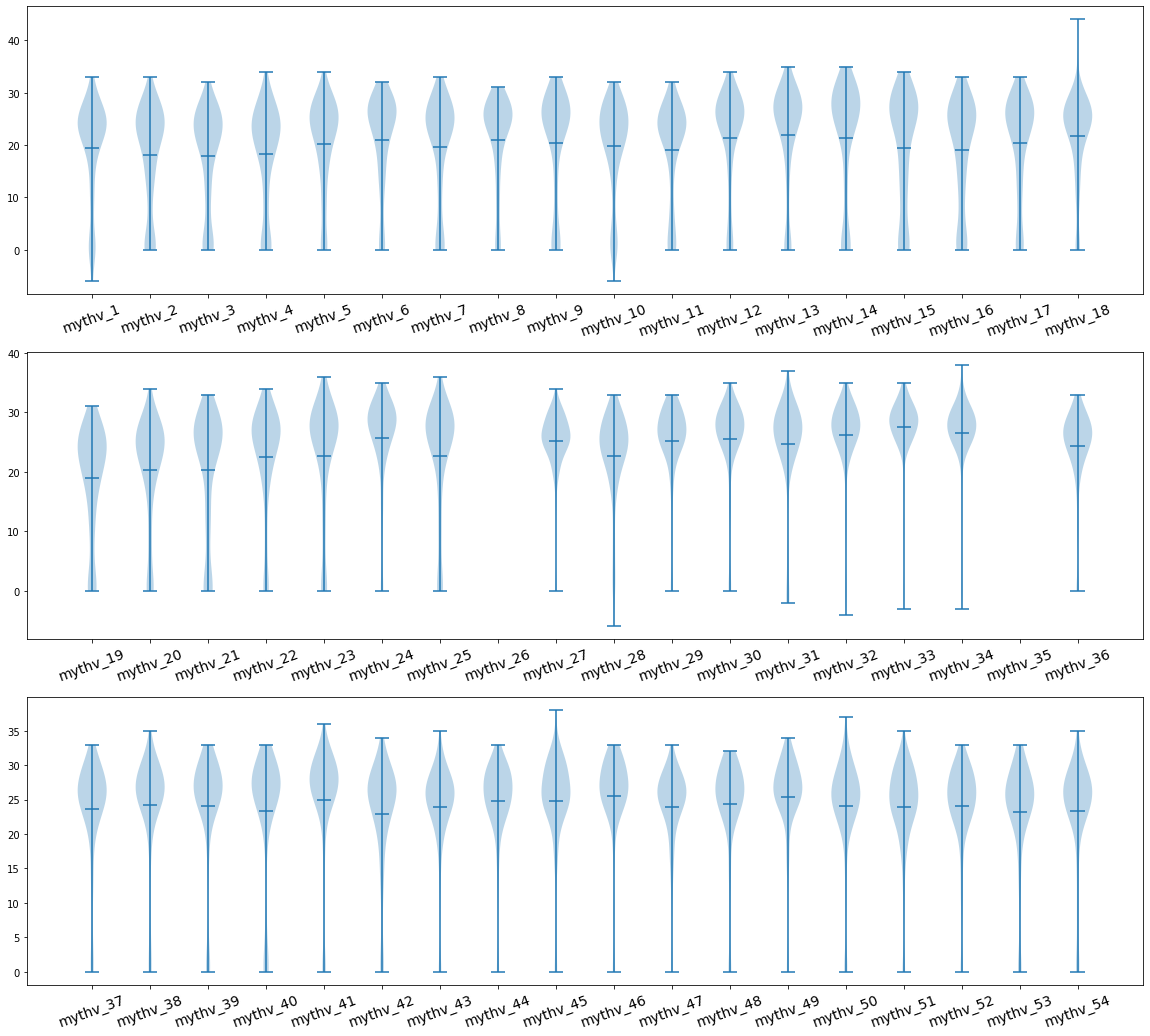

In [49]:
fig, axs = plt.subplots(3, 1, figsize = (20, 18))
for k in range(0, 3):
    axs[k].violinplot([df_4.iloc[:, i] for i in range(17+18*k+324, 17+18*(k+1)+324)], showmeans = True)

    plt.sca(axs[k])
    plt.xticks([i for i in range(1, 19)], [df_4.columns[i] for i in range(17+18*k+324, 17+18*(k+1)+324)],
               fontsize = 14, rotation=20)

plt.show()

6번의 검진결과가 있는 데이터를 1개의 데이터로 처리

In [53]:
use_data = pd.DataFrame()
pid_num = 1
for k in df_4['PID'].unique():
    for j in df_4['Eye'].unique():
        sel_data = df_4[(df_4['PID']==k)&(df_4['Eye']==j)]
        if len(sel_data)==0 : continue
        for i in range(len(sel_data)-5):
            sel_data[0+i:6+i]['PID'] = pid_num
            if (len(use_data) == 0) : 
                use_data = sel_data[0+i:6+i].copy()
            else : 
                use_data = pd.concat([use_data, sel_data[0+i:6+i].copy()])
            pid_num += 1
            
use_data = use_data.drop(columns = ['Exam ID']).copy()
use_data = use_data.reset_index(drop=True).copy()

In [52]:
use_data.to_csv('./data/want_data.csv', encoding = 'utf-8', index = False)